In [1]:
import numpy as np
import pandas as pd
import scipy

from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
raw_data = pd.read_csv('file:///C:/Users/JChaotogo/Documents/DataSets/insurance.csv')

# Exploring the Data

In [3]:
display(raw_data.head(2))
display(raw_data.dtypes)
display(raw_data.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.5+ KB


None

In [4]:
#Save dataframe to seperate variable to manipulate. There are 3 categorical variables and 4 continuous ones.
df = raw_data
df['haschildren'] = np.where(df.children>0, 1, 0)
df['smoker'] = np.where(df.smoker=='yes', 1, 0)
df['male'] = np.where(df.sex=='male',1,0)
display(df.sex.value_counts())
display(df.smoker.value_counts())
display(df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64

0    1064
1     274
Name: smoker, dtype: int64

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

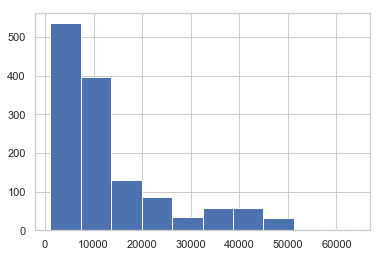

In [5]:
#Charges seems to be the most logical choice for outcome variable.
#Histogram of Charges
plt.hist(df.charges)

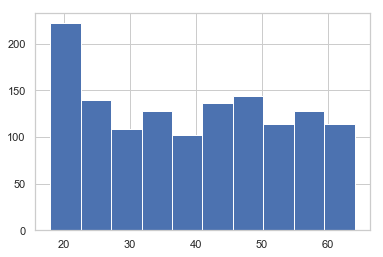

In [6]:
#Histogram of age
plt.hist(df.age)
plt.show()

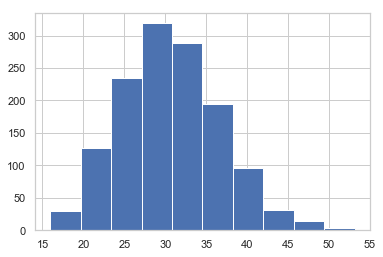

In [7]:
#Histogram of bmi
plt.hist(df.bmi)
plt.show()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

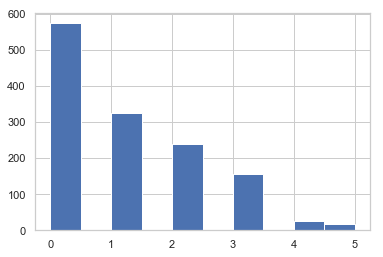

In [8]:
#Histogram of # of childeren (if applicable)
plt.hist(df.children)
df.children.value_counts()
#We can treat children as a categorical variable because they only range from 0-5 children.

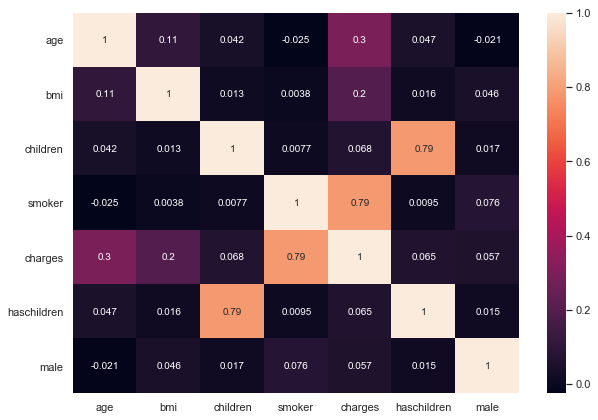

In [9]:
#Here we want to test the correlation between the continuous variables
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)


# Get Features

#### Linear Regression Model

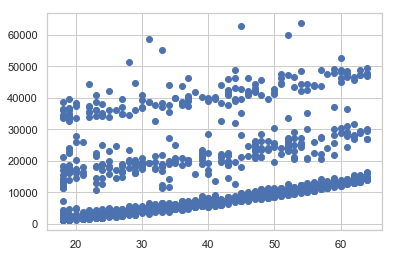

In [10]:
plt.scatter(df.age, df.charges)

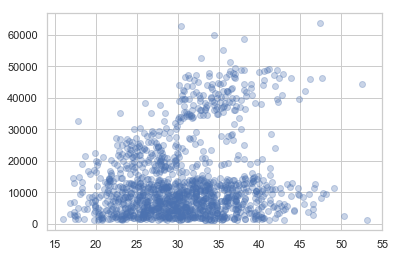

In [11]:
plt.scatter(df.bmi, df.charges, alpha=.3)

In [27]:
regr = linear_model.LinearRegression()

Y = df['charges'].values.reshape(-1,1)
X = df[['age', 'bmi', 'smoker', 'haschildren']]
regr.fit(X,Y)

lin = 'charges ~ age+bmi+haschildren+smoker'
lm = smf.ols(formula=lin, data=df).fit()
print('Parameters:\n',lm.params,'\n\nP-values:\n',lm.pvalues,'\n\nRsquared:\n',lm.rsquared)
display(lm.conf_int())

Parameters:
 Intercept     -12149.607096
age              257.936601
bmi              321.730283
haschildren      990.741181
smoker         23810.757181
dtype: float64 

P-values:
 Intercept      1.649614e-35
age            2.484221e-89
bmi            2.403068e-30
haschildren    3.244048e-03
smoker         0.000000e+00
dtype: float64 

Rsquared:
 0.7491139136139773


,0,1
Intercept,-14010.366799,-10288.847393
age,234.567450,281.305752
bmi,267.958639,375.501928
haschildren,331.667118,1649.815244
smoker,23003.098513,24618.415848


In [26]:
knn = neighbors.KNeighborsRegressor()
knn.fit(X,Y)
knn.score(X,Y)


0.5462682693655158

In [22]:
score = cross_val_score(knn, X, Y, cv=5)
score.mean()

0.206644767742005